In [2]:
import pandas as pd

df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
# Remove rows with missing countries
df = df[df['Country/Region'].notnull()]

# The rest of your code expects columns like 'date', 'total_cases', etc.,
# but your DataFrame is in a wide format (dates as columns).
# You need to reshape your DataFrame to a long format first.

# Melt the DataFrame to have 'Country/Region', 'Province/State', 'Lat', 'Long', 'date', 'cases'
df_long = df.melt(
	id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
	var_name='date',
	value_name='total_cases'
)

# Convert date to datetime
df_long['date'] = pd.to_datetime(df_long['date'])

# Fill missing values
df_long.fillna(0, inplace=True)

# Filter relevant columns
df_long = df_long[['Country/Region', 'date', 'total_cases']]

# Now df_long is ready for further analysis


C:\Users\DELL\AppData\Local\Temp\ipykernel_34572\944386311.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_long['date'] = pd.to_datetime(df_long['date'])


In [6]:
# Top 10 countries with most total cases:
latest = df_long[df_long['date'] == df_long['date'].max()]
top_countries = latest.sort_values(by='total_cases', ascending=False).head(10)


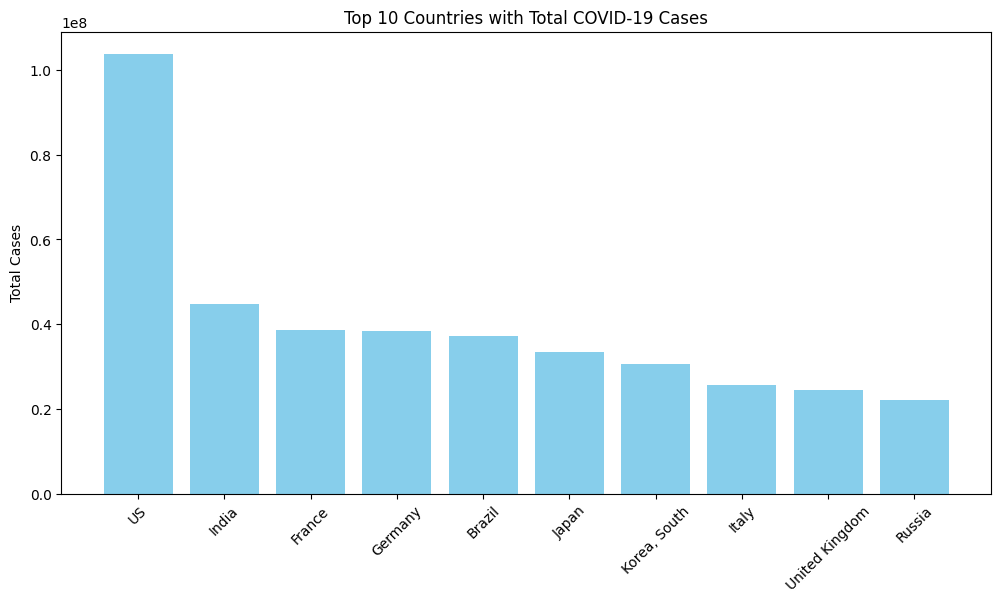

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(top_countries['Country/Region'], top_countries['total_cases'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_34572\783937055.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['date'] = pd.to_datetime(df_melted['date'])


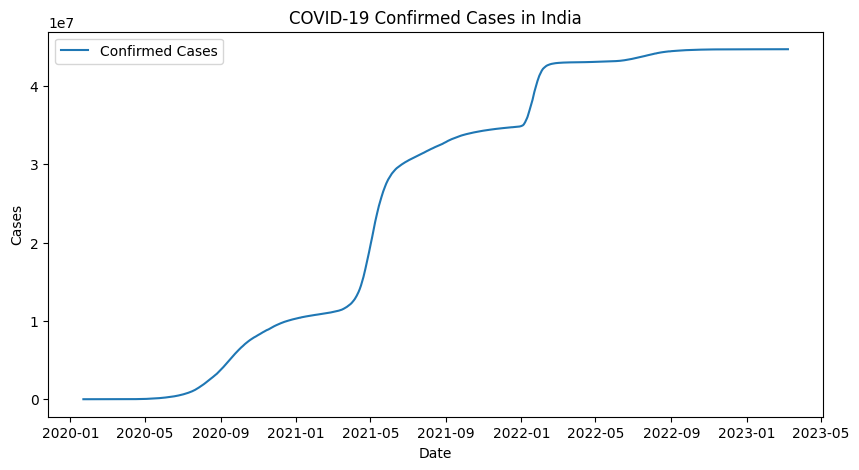

In [15]:
df_melted = df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='date',
    value_name='confirmed'
)

# Now convert 'date' column to datetime
df_melted['date'] = pd.to_datetime(df_melted['date'])

# Filter for India
india = df_melted[df_melted['Country/Region'] == 'India']

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(india['date'], india['confirmed'], label='Confirmed Cases')
plt.title("COVID-19 Confirmed Cases in India")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()


In [ ]:
from pathlib import Path

def load_and_melt(path, value_name):
    """
    path: Path to a JHU time‑series CSV
    value_name: new column name for confirmed / deaths / recovered
    returns: tidy DataFrame with cols:
        Province/State | Country/Region | Lat | Long | date | <value_name>
    """
    df = pd.read_csv(path)
    # melt all columns that look like dates
    id_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df = df.melt(id_vars=id_cols,
                 var_name='date',
                 value_name=value_name)
    df['date'] = pd.to_datetime(df['date'])      # parse mm/dd/yy ➜ datetime
    return df


In [31]:
from pathlib import Path

Path("csse_covid_19_data/csse_covid_19_time_series").mkdir(parents=True, exist_ok=True)


In [37]:
base = Path("csse_covid_19_data")

files = [
    base / "time_series_covid19_confirmed_global.csv",
    base / "time_series_covid19_deaths_global.csv",
    base / "time_series_covid19_recovered_global.csv"
]

for f in files:
    print("✅ Found:" if f.exists() else "❌ Missing:", f)


✅ Found: csse_covid_19_data\time_series_covid19_confirmed_global.csv
✅ Found: csse_covid_19_data\time_series_covid19_deaths_global.csv
✅ Found: csse_covid_19_data\time_series_covid19_recovered_global.csv


In [ ]:
confirmed = pd.read_csv(base / "time_series_covid19_confirmed_global.csv")


In [39]:
import pandas as pd
from pathlib import Path

def load_and_melt(path, value_name):
    df = pd.read_csv(path)
    id_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
    df_melted = df.melt(id_vars=id_cols, var_name='date', value_name=value_name)
    df_melted['date'] = pd.to_datetime(df_melted['date'])  # convert string to datetime
    return df_melted


In [40]:
base = Path("csse_covid_19_data")

confirmed = load_and_melt(base / "time_series_covid19_confirmed_global.csv", "confirmed")
deaths    = load_and_melt(base / "time_series_covid19_deaths_global.csv", "deaths")
recovered = load_and_melt(base / "time_series_covid19_recovered_global.csv", "recovered")

# Merge all 3 into one
df = confirmed.merge(deaths, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'])
df = df.merge(recovered, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'])

# Create active cases
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']


C:\Users\DELL\AppData\Local\Temp\ipykernel_34572\2924112008.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['date'] = pd.to_datetime(df_melted['date'])  # convert string to datetime
C:\Users\DELL\AppData\Local\Temp\ipykernel_34572\2924112008.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['date'] = pd.to_datetime(df_melted['date'])  # convert string to datetime
C:\Users\DELL\AppData\Local\Temp\ipykernel_34572\2924112008.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['date'] = pd.to_datetime(df_melted['date'])  # convert string to d

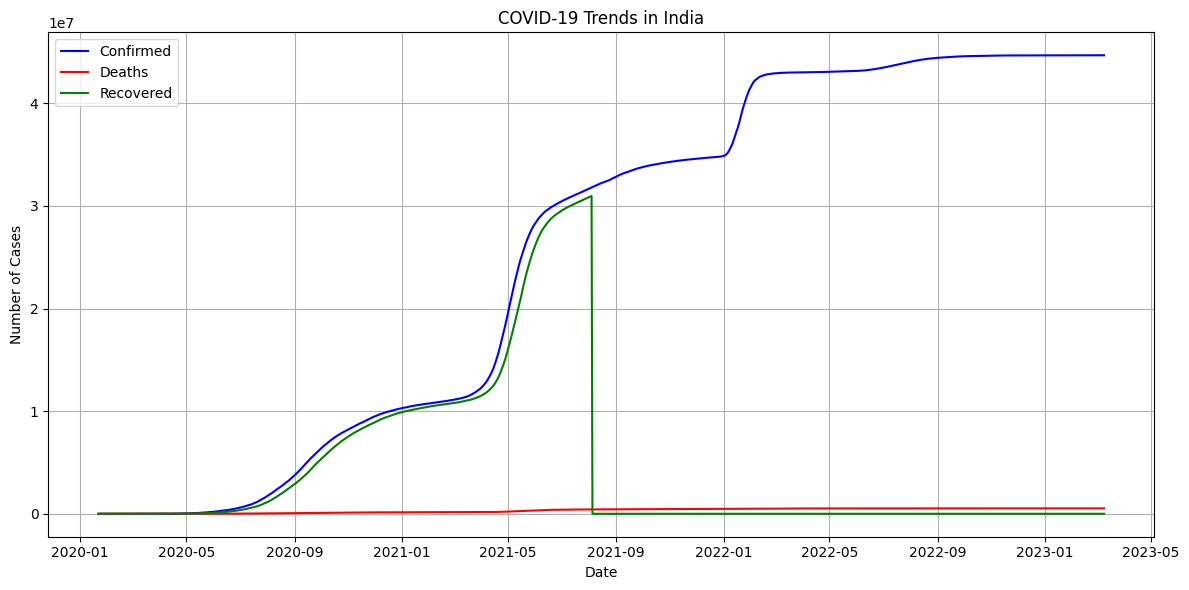

In [41]:
import matplotlib.pyplot as plt

def plot_country_trends(country_name):
    country_df = df[df['Country/Region'] == country_name]
    country_df = country_df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

    plt.figure(figsize=(12, 6))
    plt.plot(country_df.index, country_df['confirmed'], label='Confirmed', color='blue')
    plt.plot(country_df.index, country_df['deaths'], label='Deaths', color='red')
    plt.plot(country_df.index, country_df['recovered'], label='Recovered', color='green')

    plt.title(f"COVID-19 Trends in {country_name}")
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_country_trends("India")
